In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing

campaigns = pd.read_csv('D:/datax5/campaigns.csv')
client_profile = pd.read_csv('D:/datax5/client_profile.csv')
products = pd.read_csv('D:/datax5/products.csv')
purchases = pd.read_csv('D:/datax5/sample5mln.csv')

In [2]:
print('product_id', len(purchases['product_id'].value_counts()))
print('product_code', len(purchases['product_code'].value_counts()))
print('store_id', len(purchases['store_id'].value_counts()))
print('client_id', len(purchases['client_id'].value_counts()))
print('transaction_id', len(purchases['transaction_id'].value_counts()))
print('transaction_datetime', len(purchases['transaction_datetime'].value_counts()))
print('level_1', len(products['level_1'].value_counts()))
print('level_2', len(products['level_2'].value_counts()))
print('level_3', len(products['level_3'].value_counts()))
print('level_4', len(products['level_4'].value_counts()))
print('segment_id', len(products['segment_id'].value_counts()))
print('brand_id', len(products['brand_id'].value_counts()))
print('vendor_id', len(products['vendor_id'].value_counts()))

product_id 35570
product_code 35570
store_id 13714
client_id 43656
transaction_id 881764
transaction_datetime 812550
level_1 3
level_2 42
level_3 201
level_4 790
segment_id 116
brand_id 4296
vendor_id 3193


## Clusterization
### PSA

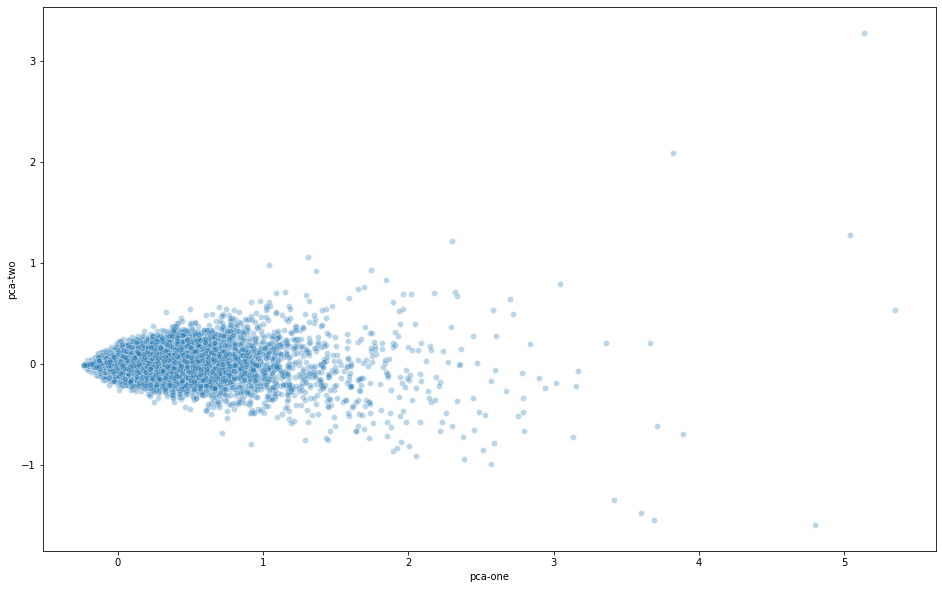

In [3]:
client_prod = purchases.merge(products,how='left',on=['product_id'])
client_prod['transaction_datetime'] = pd.to_datetime(client_prod['transaction_datetime'], format='%Y-%m-%dT%H:%M:%S')

#matrix by level_4
client_lev4_purch = pd.pivot_table(client_prod, values='purchase_sum', index=['client_id'], columns=['level_4'], fill_value=0)

#scaled
x = client_lev4_purch.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

#PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
#client_lev4_purch['pca-three'] = pca_result[:,2]

#Scatterplot
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)

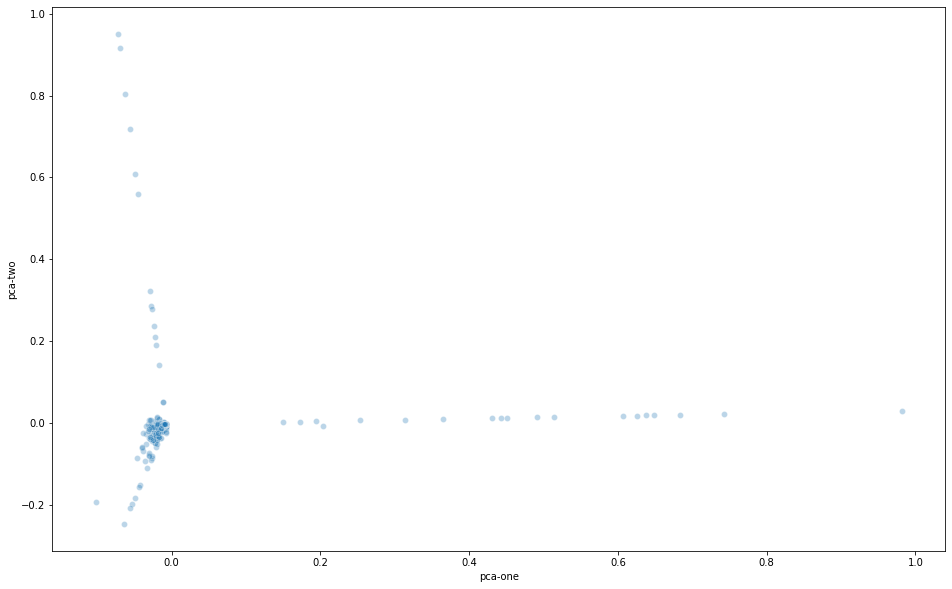

In [4]:
#or get slice from level4
dict = client_prod['level_4'].value_counts().reset_index().tail(100)['index'].tolist()
client_prod_query = client_prod.query('level_4 in @dict')

#than matrix by level_4
#than scaled and PCA again

#matrix by level_4
client_lev4_purch = pd.pivot_table(client_prod_query, values='purchase_sum', index=['client_id'], columns=['level_4'], fill_value=0)

#scaled
x = client_lev4_purch.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

#PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
#client_lev4_purch['pca-three'] = pca_result[:,2]

#Scatterplot
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)

47595


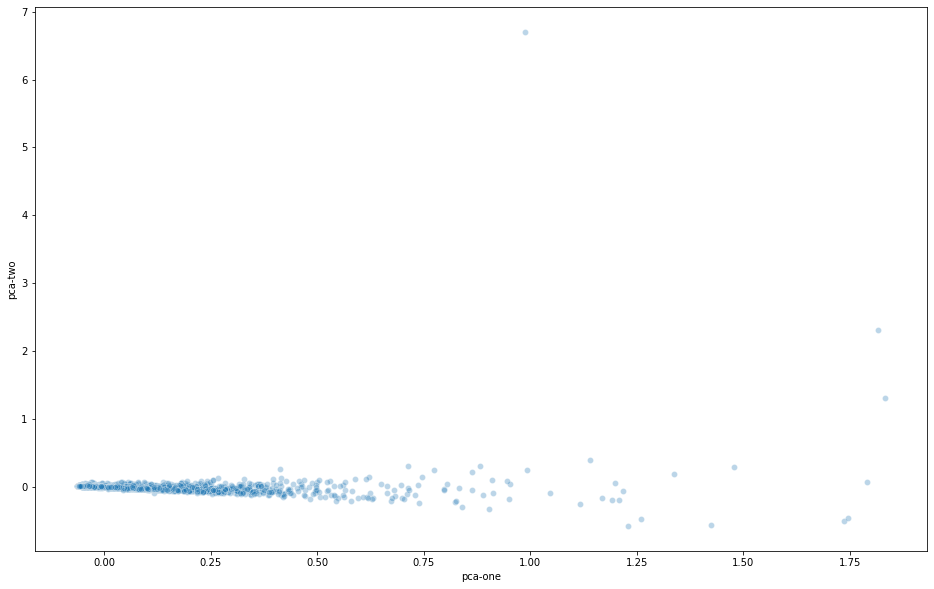

In [5]:
#or matrix by product_id by day
client_prod_yaer = client_prod[client_prod['transaction_datetime'].dt.year == 2019]
client_prod_month = client_prod_yaer[client_prod_yaer['transaction_datetime'].dt.month == 2]
client_prod_day = client_prod_month[client_prod_month['transaction_datetime'].dt.day == 20]
print(len(client_prod_day))

client_lev4_purch = pd.pivot_table(client_prod_day, values='purchase_sum', index=['client_id'], columns=['product_id'], fill_value=0)

#than scaled and PCA again

#scaled
x = client_lev4_purch.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

#PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
#client_lev4_purch['pca-three'] = pca_result[:,2]

#Scatterplot
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)

## Clusterization
### TSNE

In [10]:
client_prod.shape

(5000000, 24)

In [20]:
df = client_prod[['client_id','product_id', 'purchase_sum']].drop_duplicates()
N = 1000000
pdf = pd.pivot_table(df[:N], index='client_id', columns='product_id', aggfunc='count')
pdf.fillna(0, inplace=True)
pdf.max().max()

88.0

In [21]:
pdf.head()

purchase_sum  \
product_id                       00038706767a6e04955f3eaa5d68e8b0   
client_id                                                           
000702109b7322b9117be8a1d71fb076                              0.0   
00076d626049b167d439963525d3b853                              0.0   
000b585ab307da539c5a45c01440ba3c                              0.0   
0012fbc750ef4ea6df3033a871293631                              0.0   
001eb02c3218dfa83c3136d0b6e18354                              0.0   

                                                                   \
product_id                       0003ceaf69929bcd97a2e083a0afa057   
client_id                                                           
000702109b7322b9117be8a1d71fb076                              0.0   
00076d626049b167d439963525d3b853                              0.0   
000b585ab307da539c5a45c01440ba3c                              0.0   
0012fbc750ef4ea6df3033a871293631                              0.0   
001eb02c3218dfa83c3136d0b6e18354                              0.0   

                                                                   \
product_id                       000701e09330984eddde89326de6448c   
client_id                                                           
000702109b7322b9117be8a1d71fb076                              0.0   
00076d626049b167d439963525d3b853                              0.0   
000b585ab307da539c5a45c01440ba3c                              0.0   
0012fbc750ef4ea6df3033a871293631                              0.0   
001eb02c3218dfa83c3136d0b6e18354                              0.0   

                                                                   \
product_id                       0007149564ec800a19fa9470e9bde176   
client_id                                                           
000702109b7322b9117be8a1d71fb076                              0.0   
00076d626049b167d439963525d3b853                              0.0   
000b585ab307da539c5a45c01440ba3c                              0.0   
0012fbc750ef4ea6df3033a871293631                              0.0   
001eb02c3218dfa83c3136d0b6e18354                              0.0   

                                                                   \
product_id                       0009170c33315ca02a992aa7e751cc02   
client_id                                                           
000702109b7322b9117be8a1d71fb076                              0.0   
00076d626049b167d439963525d3b853                              0.0   
000b585ab307da539c5a45c01440ba3c                              0.0   
0012fbc750ef4ea6df3033a871293631                              0.0   
001eb02c3218dfa83c3136d0b6e18354                              0.0   

                                                                   \
product_id                       000b76558e8c25a4e4365d09f133d1bc   
client_id                                                           
000702109b7322b9117be8a1d71fb076                              0.0   
00076d626049b167d439963525d3b853                              0.0   
000b585ab307da539c5a45c01440ba3c                              0.0   
0012fbc750ef4ea6df3033a871293631                              0.0   
001eb02c3218dfa83c3136d0b6e18354                              0.0   

                                                                   \
product_id                       00117bd32b400d5e0198650cb3a91a0f   
client_id                                                           
000702109b7322b9117be8a1d71fb076                              0.0   
00076d626049b167d439963525d3b853                              0.0   
000b585ab307da539c5a45c01440ba3c                              0.0   
0012fbc750ef4ea6df3033a871293631                              0.0   
001eb02c3218dfa83c3136d0b6e18354                              0.0   

                                                                   \
product_id                       0011ab9d9793c8db9a554f2658609357   
client_id                                   

In [22]:
df_tsne = TSNE(verbose=2, learning_rate=200, n_jobs=-1).fit_transform(pdf)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8854 samples in 81.622s...
[t-SNE] Computed neighbors for 8854 samples in 975.501s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8854
[t-SNE] Computed conditional probabilities for sample 2000 / 8854
[t-SNE] Computed conditional probabilities for sample 3000 / 8854
[t-SNE] Computed conditional probabilities for sample 4000 / 8854
[t-SNE] Computed conditional probabilities for sample 5000 / 8854
[t-SNE] Computed conditional probabilities for sample 6000 / 8854
[t-SNE] Computed conditional probabilities for sample 7000 / 8854
[t-SNE] Computed conditional probabilities for sample 8000 / 8854
[t-SNE] Computed conditional probabilities for sample 8854 / 8854
[t-SNE] Mean sigma: 1.368086
[t-SNE] Computed conditional probabilities in 0.678s
[t-SNE] Iteration 50: error = 117.8399200, gradient norm = 0.2495202 (50 iterations in 6.371s)
[t-SNE] Iteration 100: error = 119.2772675, gradient norm = 0.1707667 (50 iterations 

In [23]:
all_clients_count = df['client_id'].nunique()
print(f'Всего клиентов попало {pdf.shape[0]} из {all_clients_count}')
t = np.arange(pdf.shape[0])

Всего клиентов попало 8854 из 43656


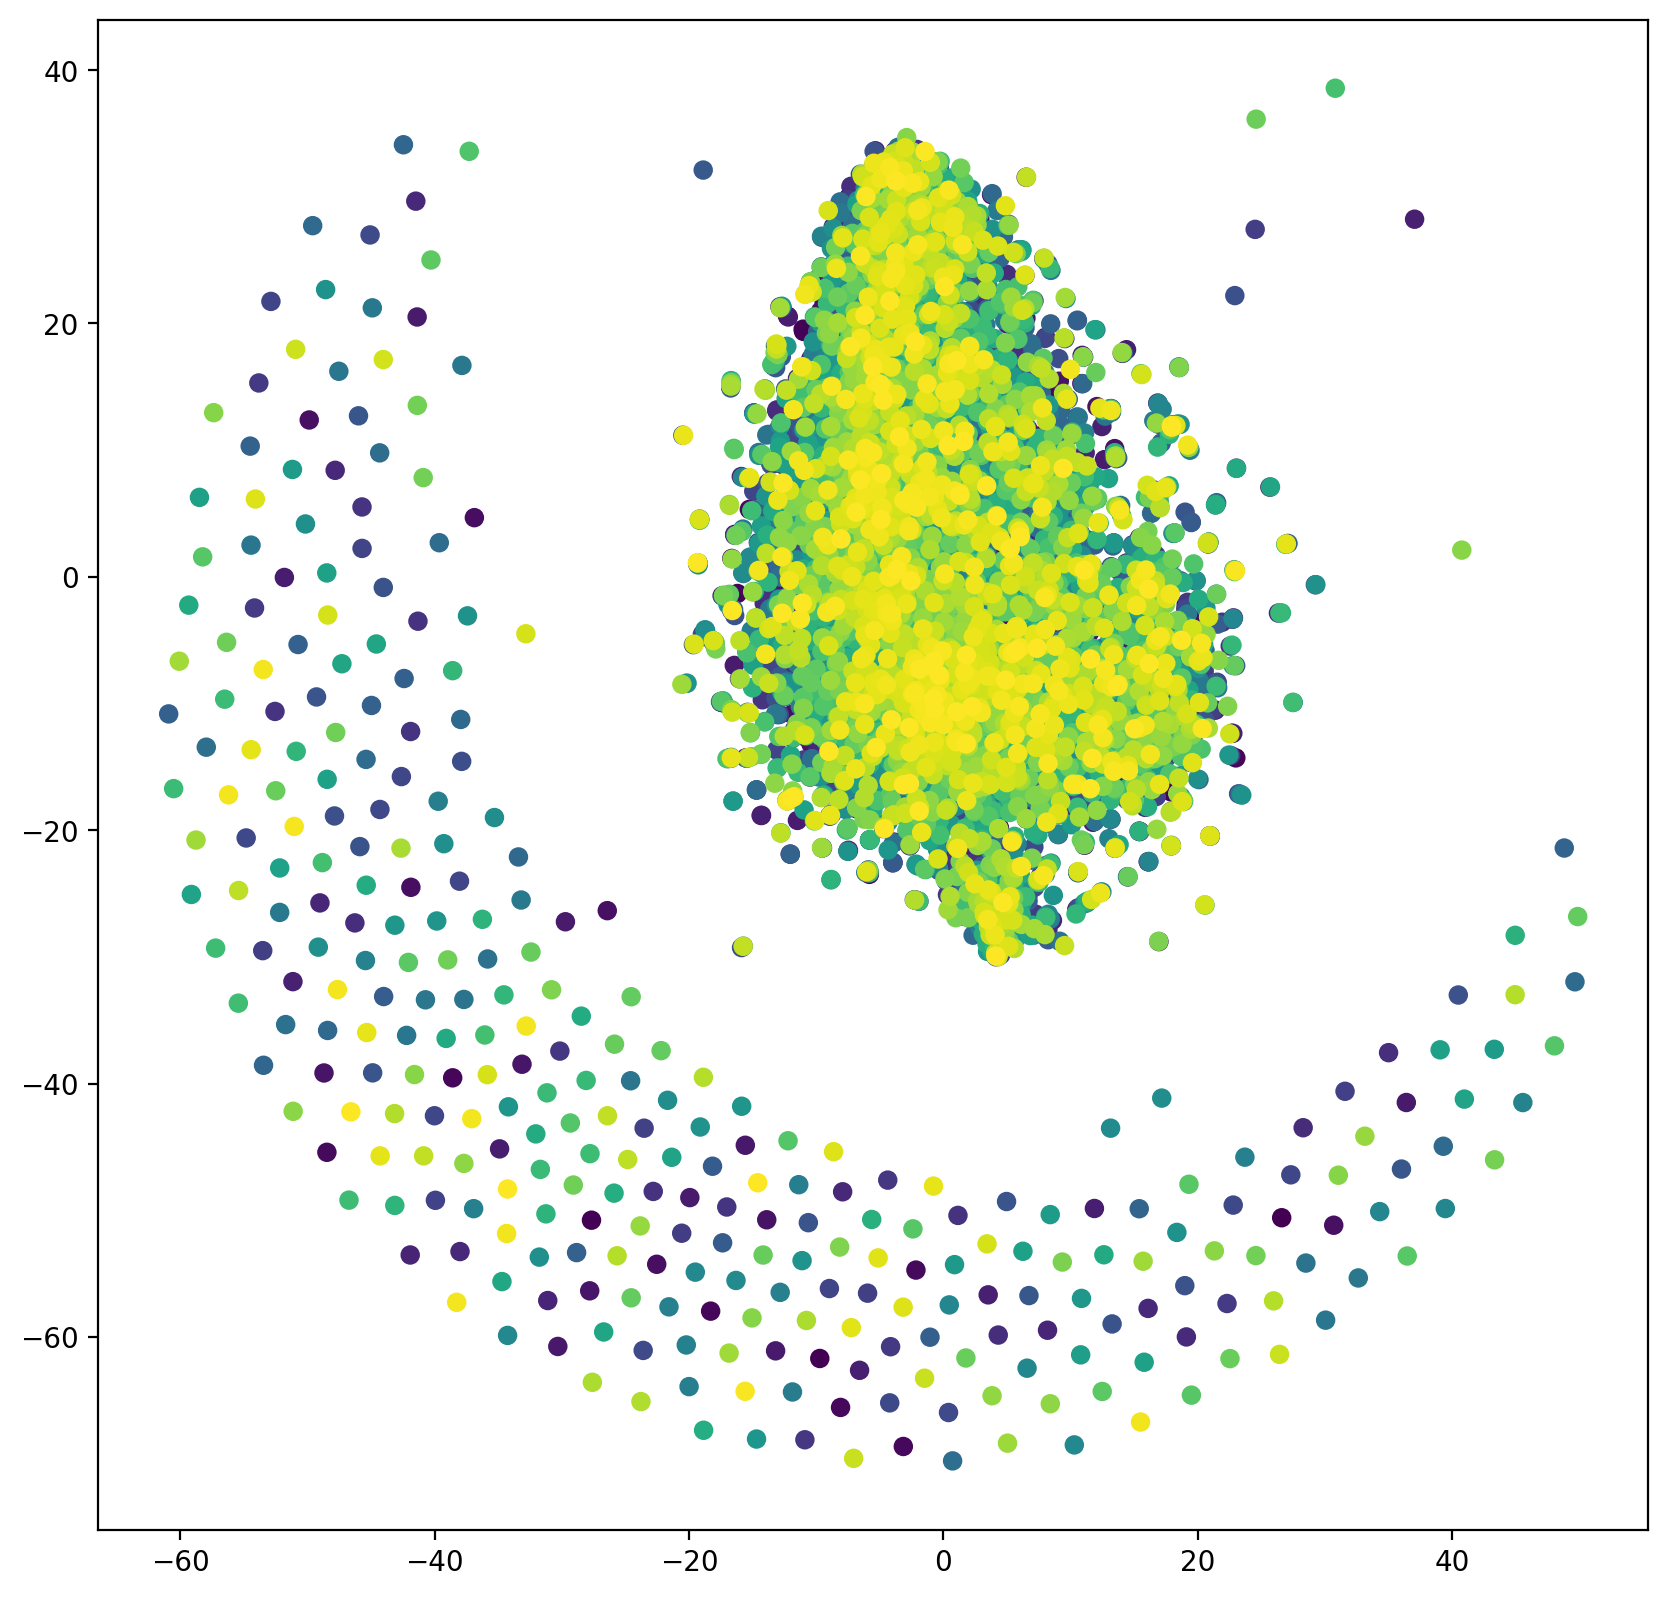

In [24]:
plt.figure(figsize=(10,10), dpi=200)
plt.scatter(x=df_tsne[:, 0], y=df_tsne[:, 1], c=t, cmap='viridis');